In [43]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [44]:
from luwiji.xgboost import illustration

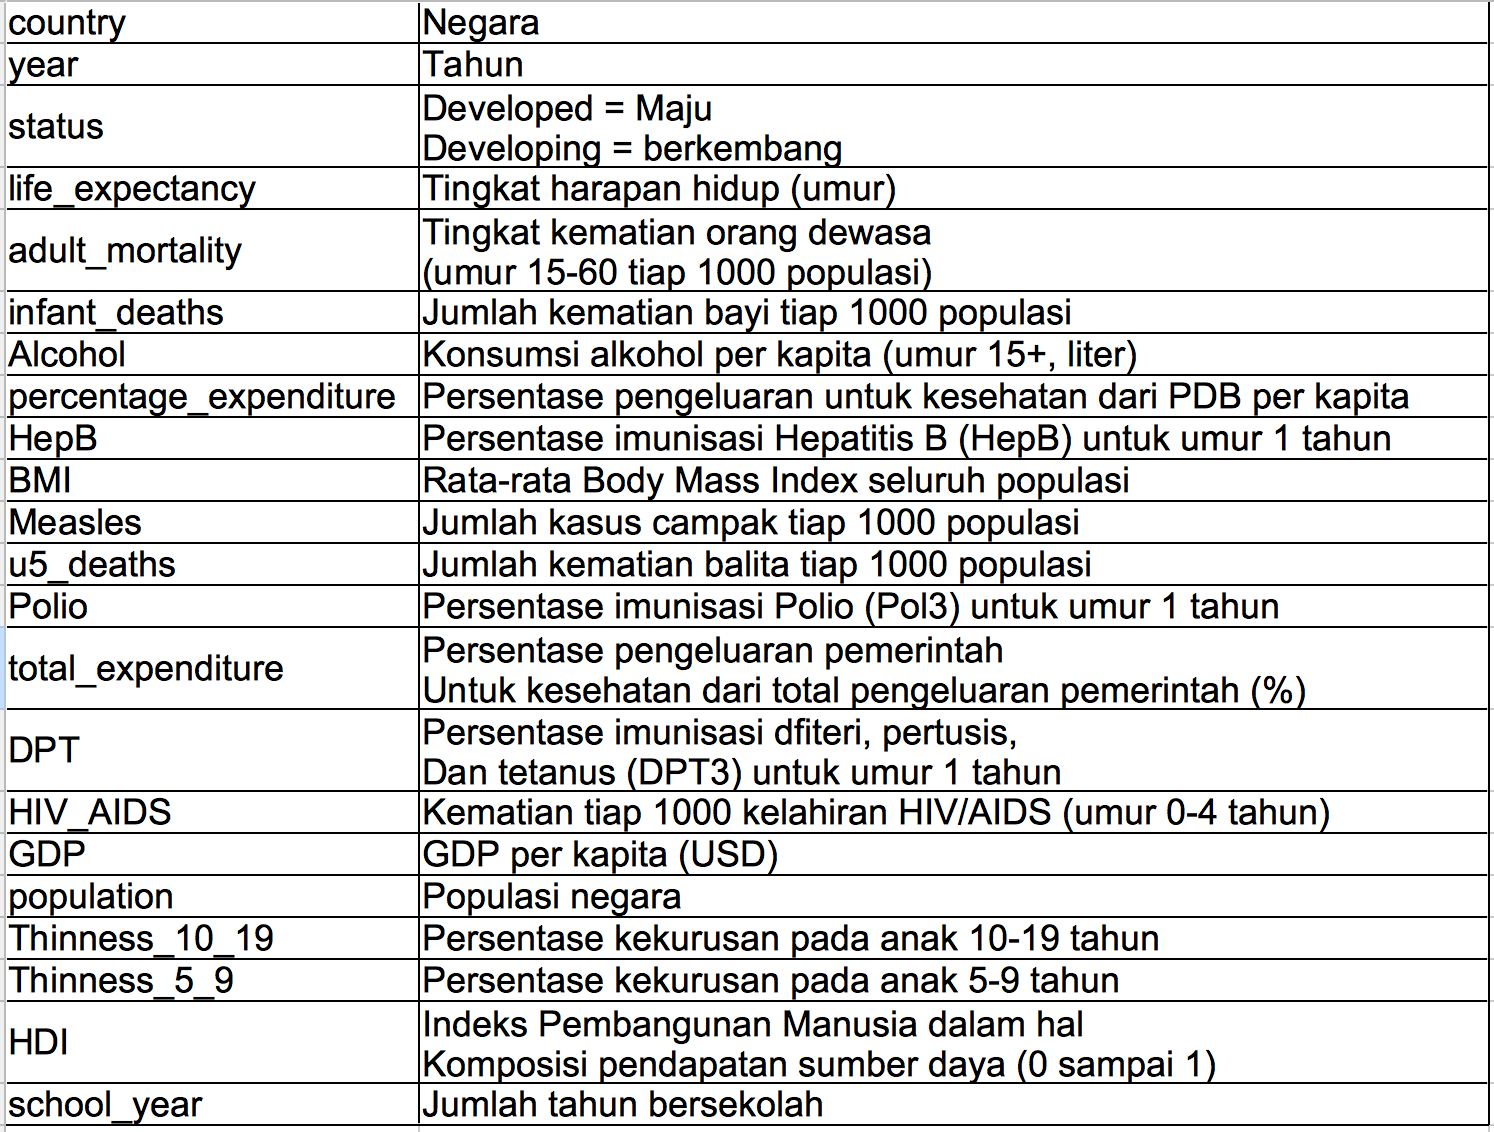

In [45]:
illustration.nomenklatur

# Import Data

In [46]:
df = pd.read_csv("data/life_expectancy.csv")
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,school_year
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


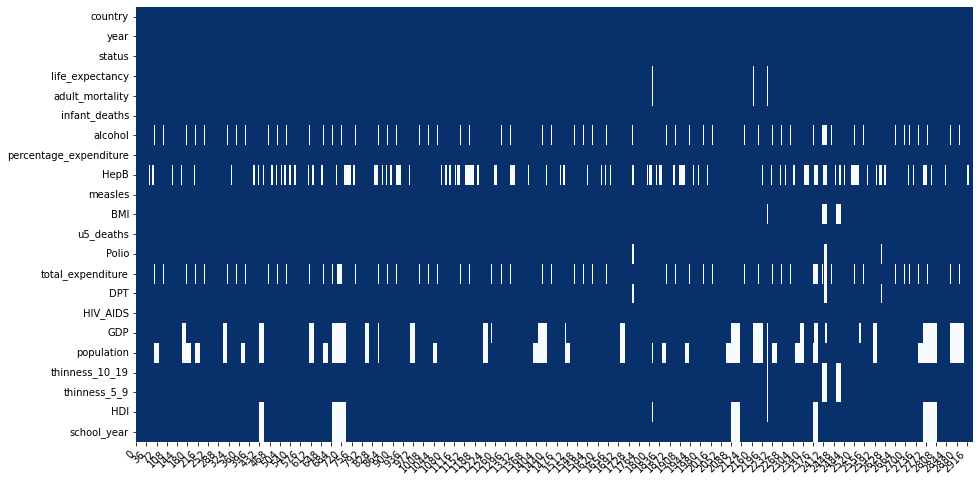

In [47]:
plot_missing_value(df)

In [48]:
df = df[~df.life_expectancy.isna()] 

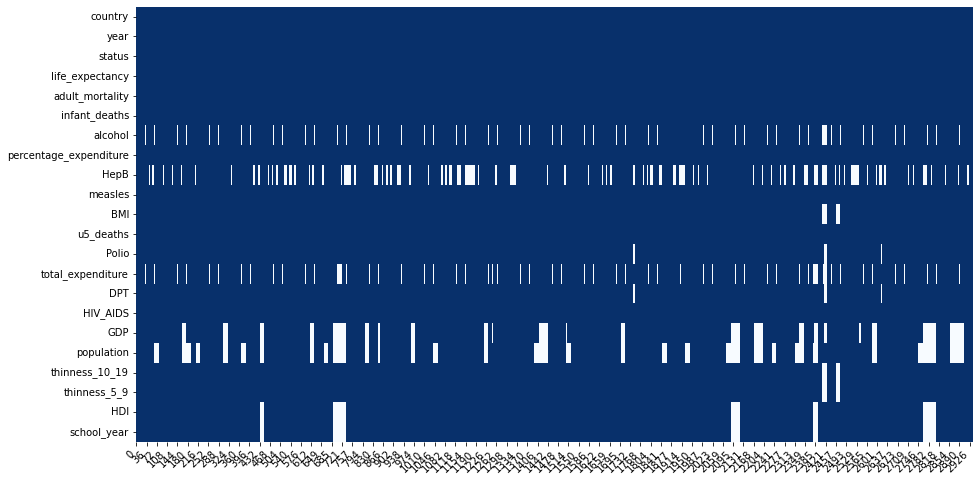

In [49]:
plot_missing_value(df)

# Dataset Splitting

In [50]:
X = df.drop(columns="life_expectancy")
y = df.life_expectancy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2342, 21), (586, 21), (2342,), (586,))

# Training

In [1]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp, grid_search_params as gsp
from jcopml.tuning.space import Integer, Real

E:\anaconda3\envs\jcopml2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [52]:
X_train.columns

Index(['country', 'year', 'status', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'HepB', 'measles', 'BMI',
       'u5_deaths', 'Polio', 'total_expenditure', 'DPT', 'HIV_AIDS', 'GDP',
       'population', 'thinness_10_19', 'thinness_5_9', 'HDI', 'school_year'],
      dtype='object')

In [53]:
pd.options.display.max_columns = 100

In [54]:
X_train.head()

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,school_year
2268,Serbia,2012,Developing,126.0,1,9.38,742.510971,97.0,0,58.3,1,93.0,9.89,91.0,0.1,5659.382400,719977.0,2.1,2.1,0.767,14.0
1680,Mauritius,2002,Developing,179.0,0,4.14,369.631710,88.0,0,26.4,0,88.0,4.24,88.0,0.1,3957.512960,124621.0,7.9,7.9,0.683,12.5
2785,United Republic of Tanzania,2008,Developing,376.0,92,3.44,0.000000,86.0,3413,19.6,138,89.0,4.21,86.0,7.4,NaN,NaN,7.3,7.3,NaN,NaN
2512,Sweden,2008,Developed,62.0,0,6.90,8105.590882,NaN,25,56.5,0,98.0,9.23,98.0,0.1,55746.842380,9219637.0,1.3,1.3,0.897,15.7
1090,Guinea-Bissau,2015,Developing,275.0,4,NaN,0.000000,87.0,153,26.3,6,87.0,NaN,87.0,3.2,596.871719,177526.0,7.1,7.0,0.421,9.2


In [55]:
rsp.xgb_poly_params

{'prep__numeric__poly__degree': Integer(low=1, high=3),
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__max_depth': Integer(low=1, high=10),
 'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
 'algo__gamma': Integer(low=1, high=10),
 'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
 'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
 'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}

In [56]:
rsp.xgb_params

{'algo__max_depth': Integer(low=1, high=10),
 'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
 'algo__gamma': Integer(low=1, high=10),
 'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
 'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
 'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}

In [57]:
parameter = {'algo__max_depth': Integer(low=1, high=10),
             'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
             'algo__n_estimators': Integer(low=100, high=200),
             'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
             'algo__gamma': Integer(low=1, high=10),
             'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
             'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
             'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')
            }

In [58]:
rsp.xgb_params

{'algo__max_depth': Integer(low=1, high=10),
 'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
 'algo__gamma': Integer(low=1, high=10),
 'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
 'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
 'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}

In [59]:
df.country.value_counts()

Afghanistan    16
New Zealand    16
Niger          16
Nigeria        16
Norway         16
               ..
Ghana          16
Greece         16
Grenada        16
Guatemala      16
Zimbabwe       16
Name: country, Length: 183, dtype: int64

In [60]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['year', 'adult_mortality', 'infant_deaths',
                             'alcohol', 'percentage_expenditure', 'HepB', 'measles', 'BMI',
                             'u5_deaths', 'Polio', 'total_expenditure', 'DPT', 'HIV_AIDS', 'GDP',
                             'population', 'thinness_10_19', 'thinness_5_9', 'HDI', 'school_year']),
    ('categoric', cat_pipe(encoder='onehot'), ["country", "status"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3 , n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.42066805426927745, 'algo__gamma': 1, 'algo__learning_rate': 0.035015835937029005, 'algo__max_depth': 9, 'algo__n_estimators': 176, 'algo__reg_alpha': 2.772824182801065, 'algo__reg_lambda': 0.0010661259689433889, 'algo__subsample': 0.5553736512887829}
0.9865252262096966 0.957951869451762 0.9650497274770851


# Phase 2 Feature importance

In [ ]:
from jcopml.feature_importance import mean_loss_decrease

In [ ]:
df_imp = mean_loss_decrease(X_train, model, plot=True, topk=20)

In [ ]:
list(df_imp.feature):10

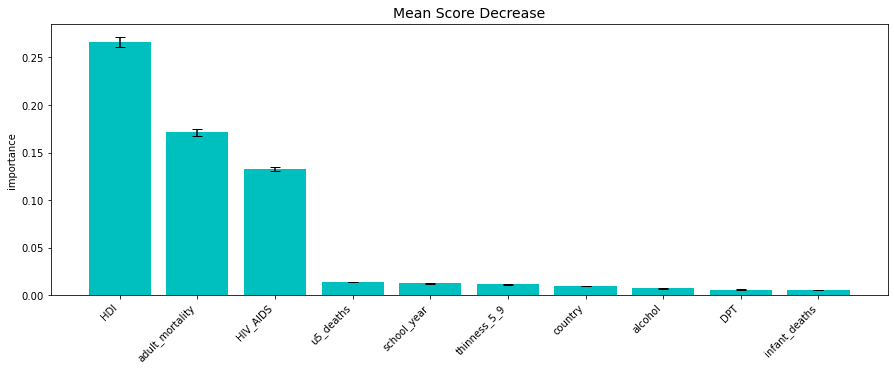

In [61]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

In [62]:
list(df_imp.feature)[:10]

['HDI',
 'adult_mortality',
 'HIV_AIDS',
 'u5_deaths',
 'school_year',
 'thinness_5_9',
 'country',
 'alcohol',
 'DPT',
 'infant_deaths']

In [63]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['HDI', 'adult_mortality', 'HIV_AIDS', 'u5_deaths', 'school_year', 'thinness_5_9', 'alcohol', 'DPT', 'infant_deaths']),
    ('categoric', cat_pipe(encoder='onehot'), ["country"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3 , n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.7048235217656795, 'algo__gamma': 3, 'algo__learning_rate': 0.08534852819566892, 'algo__max_depth': 6, 'algo__n_estimators': 157, 'algo__reg_alpha': 2.7645119606152053, 'algo__reg_lambda': 0.010023177978572915, 'algo__subsample': 0.3194173672147116}
0.9847610520601999 0.9595854577553765 0.9671050059963189


# Phase 3 Polynomial

In [65]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['HDI', 'adult_mortality', 'HIV_AIDS', 'u5_deaths', 'school_year', 'thinness_5_9', 'alcohol', 'DPT', 'infant_deaths']),
    ('categoric', cat_pipe(encoder='onehot'), ["country"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_poly_params, cv=3 , n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.6914001956501502, 'algo__gamma': 5, 'algo__learning_rate': 0.16727902653067211, 'algo__max_depth': 7, 'algo__n_estimators': 166, 'algo__reg_alpha': 0.009793184984206244, 'algo__reg_lambda': 0.02653937643936054, 'algo__subsample': 0.6789230552321847, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.9934942283011362 0.9620259823995196 0.9671650058751013


Probabilistik bayesian

Bayesian Search

* jika jumlah iterasi sedikit lebih baik pakai random search dr pada bayesian search

# New Technique -> BayesianSearchCV

In [70]:
from skopt import BayesSearchCV
from jcopml.tuning import bayes_search_params as bsp

In [71]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['year', 'adult_mortality', 'infant_deaths',
                             'alcohol', 'percentage_expenditure', 'HepB', 'measles', 'BMI',
                             'u5_deaths', 'Polio', 'total_expenditure', 'DPT', 'HIV_AIDS', 'GDP',
                             'population', 'thinness_10_19', 'thinness_5_9', 'HDI', 'school_year']),
    ('categoric', cat_pipe(encoder='onehot'), ["country", "status"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = BayesSearchCV(pipeline, bsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

### Phase 2

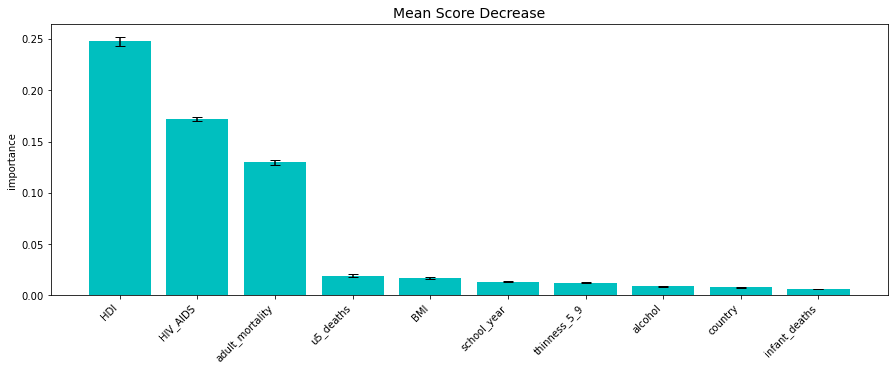

In [75]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

In [76]:
list(df_imp.feature)

['HDI',
 'HIV_AIDS',
 'adult_mortality',
 'u5_deaths',
 'BMI',
 'school_year',
 'thinness_5_9',
 'alcohol',
 'country',
 'infant_deaths']

In [77]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['HDI', 'HIV_AIDS', 'adult_mortality', 'u5_deaths', 'BMI','school_year', 'thinness_5_9', 
                             'alcohol', 'infant_deaths']),
    ('categoric', cat_pipe(encoder='onehot'), ["country"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = BayesSearchCV(pipeline, bsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

### phase 3 

In [78]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['HDI', 'HIV_AIDS', 'adult_mortality', 'u5_deaths', 'BMI','school_year', 'thinness_5_9', 
                             'alcohol', 'infant_deaths']),
    ('categoric', cat_pipe(encoder='onehot'), ["country"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = BayesSearchCV(pipeline, bsp.xgb_poly_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

# Save Model

In [79]:
save_model(model.best_estimator_, "xgb_tingkat_harapan_hidup.pkl")

Model is pickled as model/xgb_tingkat_harapan_hidup.pkl


# Load Model

In [80]:
model_yang_diload = load_model("model/xgb_tingkat_harapan_hidup.pkl")

In [82]:
df[df.country == 'Indonesia']

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,school_year
1202,Indonesia,2015,Developing,69.1,176.0,114,NaN,0.000000,78.0,15099,27.4,136,8.0,NaN,78.0,0.3,3336.166860,258162113.0,1.4,1.2,0.686,12.9
1203,Indonesia,2014,Developing,68.9,179.0,119,0.09,200.068444,78.0,12943,26.5,142,8.0,2.85,78.0,0.3,3491.595887,255131116.0,1.4,1.2,0.682,12.9
1204,Indonesia,2013,Developing,68.7,181.0,124,0.09,22.847831,85.0,8419,25.6,148,86.0,2.93,85.0,0.3,362.663981,25232263.0,1.5,1.3,0.677,12.9
1205,Indonesia,2012,Developing,68.5,183.0,129,0.08,254.468826,83.0,15489,24.7,154,84.0,2.90,83.0,0.3,3687.953996,248883232.0,1.5,1.4,0.669,12.6
1206,Indonesia,2011,Developing,68.3,185.0,134,0.08,211.878340,81.0,21893,23.8,161,81.0,2.71,81.0,0.3,3634.276850,24577511.0,1.6,1.5,0.662,12.3
1207,Indonesia,2010,Developing,68.1,187.0,138,0.08,190.545365,83.0,18869,22.9,167,82.0,2.74,81.0,0.3,3113.486350,242524123.0,1.6,1.5,0.656,12.1
1208,Indonesia,2009,Developing,67.9,189.0,143,0.08,125.798068,82.0,20818,22.1,174,85.0,2.83,78.0,0.3,2254.445660,23934478.0,1.7,1.6,0.645,11.7
1209,Indonesia,2008,Developing,67.7,189.0,149,0.07,10.263411,82.0,15369,21.3,181,83.0,2.81,77.0,0.2,216.527660,236159276.0,1.7,1.7,0.641,11.7
1210,Indonesia,2007,Developing,67.5,19.0,154,0.06,102.633435,76.0,19456,2.5,188,77.0,3.10,73.0,0.2,1855.939150,232989141.0,1.8,1.7,0.638,11.0
1211,Indonesia,2006,Developing,67.3,191.0,159,0.06,72.015932,66.0,20422,19.7,194,78.0,2.91,72.0,0.1,1586.254000,22983822.0,1.8,1.8,0.632,10.9


In [83]:
X_test.head()

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,school_year
2399,South Africa,2009,Developing,449.0,46,7.60,782.598714,74.0,5857,46.4,70,75.0,8.39,76.0,19.0,5888.628400,5.255813e+06,8.1,9.8,0.622,12.8
196,Bangladesh,2011,Developing,14.0,118,0.01,62.349885,96.0,5625,15.8,150,96.0,3.16,96.0,0.1,835.789341,1.539119e+08,18.7,19.2,0.545,9.4
2316,Singapore,2012,Developed,59.0,0,1.89,6041.858981,97.0,42,32.4,0,97.0,4.22,97.0,0.1,54431.161990,NaN,2.2,2.1,0.917,15.4
1735,Montenegro,2012,Developing,11.0,0,0.01,648.133178,9.0,0,6.2,0,94.0,7.25,94.0,0.1,6586.719290,6.261000e+03,1.9,1.9,0.797,15.1
1102,Guinea-Bissau,2003,Developing,38.0,5,2.16,2.527115,NaN,1158,19.0,8,65.0,5.62,6.0,4.6,36.571858,1.321220e+05,9.6,9.5,0.000,7.4


In [81]:
model_yang_diload.predict(X_test)

array([55.038994, 69.42901 , 82.87811 , 75.8787  , 53.58821 , 66.07446 ,
       73.10882 , 73.75232 , 75.19121 , 68.019966, 73.385735, 74.98105 ,
       44.45151 , 48.34877 , 75.08672 , 74.74924 , 78.22314 , 77.63834 ,
       80.998276, 72.86871 , 61.523758, 82.64754 , 51.1452  , 63.40581 ,
       71.20086 , 47.785736, 51.67647 , 74.3753  , 64.520195, 77.83397 ,
       73.11285 , 76.56311 , 63.98625 , 70.88827 , 73.229675, 57.4389  ,
       74.394196, 69.46565 , 77.257965, 74.50196 , 58.38643 , 67.432045,
       80.80879 , 53.71816 , 51.892097, 68.86344 , 80.52376 , 67.67373 ,
       64.850136, 60.555298, 71.98003 , 72.82483 , 66.49918 , 59.109585,
       67.92816 , 72.87462 , 69.188614, 73.54558 , 75.42992 , 56.645912,
       73.07299 , 70.397804, 60.41393 , 51.095325, 54.01456 , 83.6461  ,
       61.92494 , 54.00241 , 74.16731 , 72.799805, 74.42554 , 80.75751 ,
       74.74437 , 75.463745, 51.75311 , 74.49838 , 74.84478 , 74.4427  ,
       74.84463 , 75.99971 , 75.36686 , 81.70759 , 